# Project 2

In [45]:
from sklearn.linear_model import LogisticRegressionCV, RidgeCV, LassoCV, LassoLarsCV
from sklearn.preprocessing import StandardScaler, LabelBinarizer, LabelEncoder
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

le = LabelEncoder()
lb = LabelBinarizer()

In [41]:
def datachecks(df):
    display('__'*len(df.columns))
    
    display("HEAD", df.head(3))
    display("TAIL", df.tail(3))
    
    display('__'*len(df.columns))
   
    def gotnulls(df):
        
        # no personality
        if df.isnull().sum().sum() > 1:
            print('NULL COLUMNS: ')
            print([
                print(x, ' : ', 
                      df[x].dtype) for x in train.columns[train.isnull().any()]], 
                '\n')
    
    def whodat(df):
        
        # column, explain yourself
        werd = df.select_dtypes(include = ["object"]).columns
        numbahs = df.select_dtypes(include = ["int", "float64"]).columns
        boules = df.select_dtypes(include = ["bool"]).columns
        
        # watch out for those non-numerics, kid
        if len(werd) >= 1:
            print(f'\n\n There are {len(werd)} non-numeric columns \n\n')
            display(train.describe(include=[np.object]).T)
            
        elif len(boules) >= 1:
            print(f'\n\n There are {len(werd)} boolean columns: \n\n')
            print(train.describe(include=['bool']).T)
            
        print(f'\n\n {len(numbahs)} Numeric columns: \n\n')
        display(train.describe(include=[np.number]).T)

    
    
    return gotnulls(df), whodat(df)
    return "INFO", df.info(memory_usage='deep')


#     display("NULL VALUES: ",df.isnull().sum(),"IS NA: ", 
#     df.isna().sum().sum())
#     display("DESCRIPTIONS: ", df.describe(), df.info())
    


In [67]:
featuredictcsv = pd.read_csv("featuredict.csv")

featdict = pd.DataFrame(featuredictcsv)


In [74]:
# colnames = [x for x in featdict.iteritems() if " : " in x]
colnames = featdict.loc[featdict.iloc[:,0].str.contains(':')]

In [77]:
colnames.index

Int64Index([  0,  17,  26,  27,  28,  31,  35,  40,  45,  50,  56,  60,  86,
             96, 106, 112, 114, 115, 117, 118, 121, 132, 143, 144, 145, 152,
            161, 179, 197, 203, 204, 210, 216, 223, 230, 237, 243, 251, 252,
            260, 261, 262, 263, 270, 276, 279, 285, 286, 287, 288, 289, 290,
            291, 292, 293, 294, 295, 301, 302, 311, 312, 319, 327, 328, 333,
            334, 335, 342, 349, 353, 354, 355, 356, 357, 358, 359, 365, 371,
            378, 379, 380, 381],
           dtype='int64')

In [42]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# concat the test and train a la joe, remember to reset the index!
train = pd.concat((train,test)).reset_index(drop=True)

# set y_train to our target: saleprice
y = train[['SalePrice']]

train.drop(['Id','SalePrice'], axis = 1, inplace = True)



In [43]:
X_train, X_test, y_train, y_test = train_test_split(train, y, 
                                                    test_size=0.5, 
                                                    )

In [44]:
display(X_train.shape, y_train.shape)

(1465, 79)

(1465, 1)

In [37]:
# pull out all the categorical columns to mess with them
obj_cols = [x for x in train.columns if train[x].dtype == object]
# pull out all the categorical columns to mess with them
numerics = [x for x in train.columns if train[x].dtype != object]

In [38]:
train[obj_cols].fillna('Empty')

for x in train[obj_cols]:
    le = LabelEncoder().fit(list(train[x].values))
    train[x] = le.transform(list(train[x].values))
    
for i in train[numerics]:
    train[i] = np.log1p(train[i].values)


In [33]:
model = LassoLarsCV()
model.fit(X_train, np.log(y_train))

/Users/saqibnizami/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoLarsCV(copy_X=True, cv=None, eps=2.220446049250313e-16,
      fit_intercept=True, max_iter=500, max_n_alphas=1000, n_jobs=1,
      normalize=True, positive=False, precompute='auto', verbose=False)

In [34]:
model.score(X_train, y_train)

-5.244068330784051

In [35]:
# concatulations! all the observations are added. 
display(train.shape, y_train.shape)

(2930, 79)

(2051, 1)

In [65]:
y_train.head()

,SalePrice
0,130500.0
1,220000.0
2,109000.0
3,174000.0
4,138500.0


In [66]:
# I think saleprice is still in there though
display(train.head())
# DROP THAT
train.drop(columns=['Id','SalePrice'], inplace=True)
# gonezo
display(train[['Id','SalePrice']])

,1st Flr SF,2nd Flr SF,3Ssn Porch,Alley,Bedroom AbvGr,Bldg Type,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,...,SalePrice,Screen Porch,Street,TotRms AbvGrd,Total Bsmt SF,Utilities,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold
0,725,754,0,NaN,3,1Fam,TA,No,0.0,0.0,...,130500.0,0,Pave,6,725.0,AllPub,0,1976,2005,2010
1,913,1209,0,NaN,4,1Fam,TA,No,1.0,0.0,...,220000.0,0,Pave,8,913.0,AllPub,0,1996,1997,2009
2,1057,0,0,NaN,3,1Fam,TA,No,1.0,0.0,...,109000.0,0,Pave,5,1057.0,AllPub,0,1953,2007,2010
3,744,700,0,NaN,3,1Fam,TA,No,0.0,0.0,...,174000.0,0,Pave,7,384.0,AllPub,100,2006,2007,2010
4,831,614,0,NaN,3,1Fam,Gd,No,0.0,0.0,...,138500.0,0,Pave,6,676.0,AllPub,0,1900,1993,2010


KeyError: "['Id' 'SalePrice'] not in index"

In [54]:
# got empties?
null_columns = train.columns[train.isnull().any()]

In [56]:
datachecks(train)

'______________________________________________________________________________________________________________________________________________________________'

'HEAD'

,1st Flr SF,2nd Flr SF,3Ssn Porch,Alley,Bedroom AbvGr,Bldg Type,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,...,Sale Type,Screen Porch,Street,TotRms AbvGrd,Total Bsmt SF,Utilities,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold
0,725,754,0,NaN,3,1Fam,TA,No,0.0,0.0,...,WD,0,Pave,6,725.0,AllPub,0,1976,2005,2010
1,913,1209,0,NaN,4,1Fam,TA,No,1.0,0.0,...,WD,0,Pave,8,913.0,AllPub,0,1996,1997,2009
2,1057,0,0,NaN,3,1Fam,TA,No,1.0,0.0,...,WD,0,Pave,5,1057.0,AllPub,0,1953,2007,2010


'TAIL'

,1st Flr SF,2nd Flr SF,3Ssn Porch,Alley,Bedroom AbvGr,Bldg Type,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,...,Sale Type,Screen Porch,Street,TotRms AbvGrd,Total Bsmt SF,Utilities,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold
2927,1211,0,0,NaN,3,1Fam,TA,No,0.0,0.0,...,WD,0,Pave,5,952.0,AllPub,0,1968,1968,2008
2928,864,0,0,NaN,3,1Fam,TA,No,0.0,0.0,...,WD,0,Pave,5,864.0,AllPub,0,1971,1971,2007
2929,925,0,0,NaN,3,1Fam,TA,No,1.0,0.0,...,WD,0,Pave,5,923.0,AllPub,81,1955,1955,2007


'______________________________________________________________________________________________________________________________________________________________'

NULL COLUMNS: 
Alley  :  object
Bsmt Cond  :  object
Bsmt Exposure  :  object
Bsmt Full Bath  :  float64
Bsmt Half Bath  :  float64
Bsmt Qual  :  object
Bsmt Unf SF  :  float64
BsmtFin SF 1  :  float64
BsmtFin SF 2  :  float64
BsmtFin Type 1  :  object
BsmtFin Type 2  :  object
Electrical  :  object
Fence  :  object
Fireplace Qu  :  object
Garage Area  :  float64
Garage Cars  :  float64
Garage Cond  :  object
Garage Finish  :  object
Garage Qual  :  object
Garage Type  :  object
Garage Yr Blt  :  float64
Lot Frontage  :  float64
Mas Vnr Area  :  float64
Mas Vnr Type  :  object
Misc Feature  :  object
Pool QC  :  object
Total Bsmt SF  :  float64
[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None] 



 There are 42 non-numeric columns 




,count,unique,top,freq
Alley,198,2,Grvl,120
Bldg Type,2930,5,1Fam,2425
Bsmt Cond,2850,5,TA,2616
Bsmt Exposure,2847,4,No,1906
Bsmt Qual,2850,5,TA,1283
BsmtFin Type 1,2850,6,GLQ,859
BsmtFin Type 2,2849,6,Unf,2499
Central Air,2930,2,Y,2734
Condition 1,2930,9,Norm,2522
Condition 2,2930,8,Norm,2900




 37 Numeric columns: 




,count,mean,std,min,25%,50%,75%,max
1st Flr SF,2930.0,1.159558e+03,3.918909e+02,334.0,8.762500e+02,1084.0,1.384000e+03,5.095000e+03
2nd Flr SF,2930.0,3.354560e+02,4.283957e+02,0.0,0.000000e+00,0.0,7.037500e+02,2.065000e+03
3Ssn Porch,2930.0,2.592491e+00,2.514133e+01,0.0,0.000000e+00,0.0,0.000000e+00,5.080000e+02
Bedroom AbvGr,2930.0,2.854266e+00,8.277311e-01,0.0,2.000000e+00,3.0,3.000000e+00,8.000000e+00
Bsmt Full Bath,2928.0,4.313525e-01,5.248202e-01,0.0,0.000000e+00,0.0,1.000000e+00,3.000000e+00
Bsmt Half Bath,2928.0,6.113388e-02,2.452536e-01,0.0,0.000000e+00,0.0,0.000000e+00,2.000000e+00
Bsmt Unf SF,2929.0,5.592625e+02,4.394942e+02,0.0,2.190000e+02,466.0,8.020000e+02,2.336000e+03
BsmtFin SF 1,2929.0,4.426296e+02,4.555908e+02,0.0,0.000000e+00,370.0,7.340000e+02,5.644000e+03
BsmtFin SF 2,2929.0,4.972243e+01,1.691685e+02,0.0,0.000000e+00,0.0,0.000000e+00,1.526000e+03
Enclosed Porch,2930.0,2.301160e+01,6.413906e+01,0.0,0.000000e+00,0.0,0.000000e+00,1.012000e+03


(None, None)

In [57]:
display(len(train.describe(include=[np.object]).T))
display(len(train.describe(include=[np.number]).T))

42

37

In [58]:
train[null_columns].isnull().sum()

Alley             2732
Bsmt Cond           80
Bsmt Exposure       83
Bsmt Full Bath       2
Bsmt Half Bath       2
Bsmt Qual           80
Bsmt Unf SF          1
BsmtFin SF 1         1
BsmtFin SF 2         1
BsmtFin Type 1      80
BsmtFin Type 2      81
Electrical           1
Fence             2358
Fireplace Qu      1422
Garage Area          1
Garage Cars          1
Garage Cond        159
Garage Finish      159
Garage Qual        159
Garage Type        157
Garage Yr Blt      159
Lot Frontage       490
Mas Vnr Area        23
Mas Vnr Type        23
Misc Feature      2824
Pool QC           2917
Total Bsmt SF        1
dtype: int64

Lot Frontage, Alley, Mas Vnr Area        22
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1000 - Fireplace quality
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual        114
Garage Cond        114
Pool QC           2042
Fence             1651
Misc Feature      1986

In [59]:
# def dummied(train, test):
#     l = ['MS SubClass']
#     for i in train.columns:
#         if train[i].dtype == object:
#             l.append[i]
    
    
        
# going to try LabelEncoder instead        

display(train.Alley.value_counts(dropna=False))
# drop nan in alley and binarize?

# data structure of the size needed
s = (2,)

# iterate through object columns
for x in train[obj_cols]:

    # looking for any object columns with 2 or less values for binarization candidates
    if train[x].value_counts().unique().shape <= s:
        print(x)

# check out the candidates
display(train['Street'].unique())
display(train['Alley'].unique())
display(train['Utilities'].unique())
display(train['Central Air'].unique())

# Street, Alley, Utilities, and Central Air  

NaN     2732
Grvl     120
Pave      78
Name: Alley, dtype: int64

Alley
Central Air
Street


array(['Pave', 'Grvl'], dtype=object)

array([nan, 'Pave', 'Grvl'], dtype=object)

array(['AllPub', 'NoSeWa', 'NoSewr'], dtype=object)

array(['Y', 'N'], dtype=object)

In [60]:
train.shape

(2930, 79)

In [71]:
display(X_train.shape, X_test.shape)

(1465, 79)

(1465, 79)

In [72]:
display(y_train.shape, y_test.shape)

(1465, 1)

(1465, 1)

In [73]:
datachecks(X_train)

'______________________________________________________________________________________________________________________________________________________________'

'HEAD'

,1st Flr SF,2nd Flr SF,3Ssn Porch,Alley,Bedroom AbvGr,Bldg Type,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,...,Sale Type,Screen Porch,Street,TotRms AbvGrd,Total Bsmt SF,Utilities,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold
2175,794,676,0,NaN,3,1Fam,TA,Av,0.0,1.0,...,WD,0,Pave,6,794.0,AllPub,0,1997,1997,2007
846,1248,0,0,NaN,2,TwnhsE,TA,Av,0.0,0.0,...,New,0,Pave,5,1248.0,AllPub,108,2005,2006,2006
437,1152,0,0,NaN,2,Duplex,NaN,NaN,0.0,0.0,...,WD,0,Pave,6,0.0,AllPub,0,1955,1955,2008


'TAIL'

,1st Flr SF,2nd Flr SF,3Ssn Porch,Alley,Bedroom AbvGr,Bldg Type,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,...,Sale Type,Screen Porch,Street,TotRms AbvGrd,Total Bsmt SF,Utilities,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold
2761,1698,0,0,NaN,3,1Fam,TA,No,0.0,0.0,...,WD,0,Pave,7,1698.0,AllPub,192,2005,2005,2010
893,1422,915,0,Grvl,5,2fmCon,TA,No,0.0,0.0,...,WD,0,Pave,10,662.0,AllPub,0,1900,1950,2007
2842,1173,0,0,NaN,3,1Fam,TA,Gd,1.0,0.0,...,WD,0,Pave,6,1053.0,AllPub,0,1974,1974,2010


'______________________________________________________________________________________________________________________________________________________________'

NULL COLUMNS: 
Alley  :  object
Bsmt Cond  :  object
Bsmt Exposure  :  object
Bsmt Full Bath  :  float64
Bsmt Half Bath  :  float64
Bsmt Qual  :  object
Bsmt Unf SF  :  float64
BsmtFin SF 1  :  float64
BsmtFin SF 2  :  float64
BsmtFin Type 1  :  object
BsmtFin Type 2  :  object
Electrical  :  object
Fence  :  object
Fireplace Qu  :  object
Garage Area  :  float64
Garage Cars  :  float64
Garage Cond  :  object
Garage Finish  :  object
Garage Qual  :  object
Garage Type  :  object
Garage Yr Blt  :  float64
Lot Frontage  :  float64
Mas Vnr Area  :  float64
Mas Vnr Type  :  object
Misc Feature  :  object
Pool QC  :  object
Total Bsmt SF  :  float64
[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None] 



 There are 42 non-numeric columns 




,count,unique,top,freq
Alley,198,2,Grvl,120
Bldg Type,2930,5,1Fam,2425
Bsmt Cond,2850,5,TA,2616
Bsmt Exposure,2847,4,No,1906
Bsmt Qual,2850,5,TA,1283
BsmtFin Type 1,2850,6,GLQ,859
BsmtFin Type 2,2849,6,Unf,2499
Central Air,2930,2,Y,2734
Condition 1,2930,9,Norm,2522
Condition 2,2930,8,Norm,2900




 37 Numeric columns: 




,count,mean,std,min,25%,50%,75%,max
1st Flr SF,2930.0,1.159558e+03,3.918909e+02,334.0,8.762500e+02,1084.0,1.384000e+03,5.095000e+03
2nd Flr SF,2930.0,3.354560e+02,4.283957e+02,0.0,0.000000e+00,0.0,7.037500e+02,2.065000e+03
3Ssn Porch,2930.0,2.592491e+00,2.514133e+01,0.0,0.000000e+00,0.0,0.000000e+00,5.080000e+02
Bedroom AbvGr,2930.0,2.854266e+00,8.277311e-01,0.0,2.000000e+00,3.0,3.000000e+00,8.000000e+00
Bsmt Full Bath,2928.0,4.313525e-01,5.248202e-01,0.0,0.000000e+00,0.0,1.000000e+00,3.000000e+00
Bsmt Half Bath,2928.0,6.113388e-02,2.452536e-01,0.0,0.000000e+00,0.0,0.000000e+00,2.000000e+00
Bsmt Unf SF,2929.0,5.592625e+02,4.394942e+02,0.0,2.190000e+02,466.0,8.020000e+02,2.336000e+03
BsmtFin SF 1,2929.0,4.426296e+02,4.555908e+02,0.0,0.000000e+00,370.0,7.340000e+02,5.644000e+03
BsmtFin SF 2,2929.0,4.972243e+01,1.691685e+02,0.0,0.000000e+00,0.0,0.000000e+00,1.526000e+03
Enclosed Porch,2930.0,2.301160e+01,6.413906e+01,0.0,0.000000e+00,0.0,0.000000e+00,1.012000e+03


(None, None)

In [74]:
obj_cols_xtrain = [x for x in X_train.columns if X_train[x].dtype == object]

In [90]:
X_train['Utilities'].value_counts(dropna=False)
lb = LabelBinarizer()
lb.fit_transform(X_train['Utilities'])

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

array(['AllPub', 'NoSewr'], dtype=object)

In [75]:
X_train[obj_cols_xtrain]

,Alley,Bldg Type,Bsmt Cond,Bsmt Exposure,Bsmt Qual,BsmtFin Type 1,BsmtFin Type 2,Central Air,Condition 1,Condition 2,...,Mas Vnr Type,Misc Feature,Neighborhood,Paved Drive,Pool QC,Roof Matl,Roof Style,Sale Type,Street,Utilities
2175,NaN,1Fam,TA,Av,Gd,GLQ,Unf,Y,Norm,Norm,...,None,NaN,Gilbert,Y,NaN,CompShg,Gable,WD,Pave,AllPub
846,NaN,TwnhsE,TA,Av,Gd,GLQ,Unf,Y,Norm,Norm,...,BrkFace,NaN,Blmngtn,Y,NaN,CompShg,Gable,New,Pave,AllPub
437,NaN,Duplex,NaN,NaN,NaN,NaN,NaN,N,Norm,Norm,...,None,NaN,Edwards,N,NaN,CompShg,Gable,WD,Pave,AllPub
1818,NaN,1Fam,TA,No,TA,BLQ,Unf,Y,Norm,Norm,...,None,NaN,NAmes,Y,NaN,CompShg,Gable,WD,Pave,AllPub
986,NaN,1Fam,TA,Gd,Ex,GLQ,Unf,Y,Norm,Norm,...,BrkFace,NaN,NridgHt,Y,NaN,CompShg,Hip,WD,Pave,AllPub
248,NaN,1Fam,TA,No,TA,Rec,Unf,Y,Norm,Norm,...,None,NaN,NAmes,Y,NaN,CompShg,Hip,WD,Pave,AllPub
28,NaN,2fmCon,TA,No,TA,Unf,Unf,N,Feedr,Norm,...,None,NaN,IDOTRR,N,NaN,CompShg,Gable,WD,Pave,AllPub
1161,NaN,1Fam,TA,No,Gd,GLQ,Unf,Y,Norm,Norm,...,None,NaN,Mitchel,Y,NaN,CompShg,Gable,WD,Pave,AllPub
1939,NaN,1Fam,TA,No,TA,Unf,Unf,Y,Norm,Norm,...,None,NaN,OldTown,Y,NaN,CompShg,Gable,WD,Pave,AllPub
981,NaN,1Fam,TA,No,Gd,Rec,Unf,Y,Norm,Norm,...,None,NaN,BrkSide,Y,NaN,CompShg,Gable,WD,Pave,AllPub


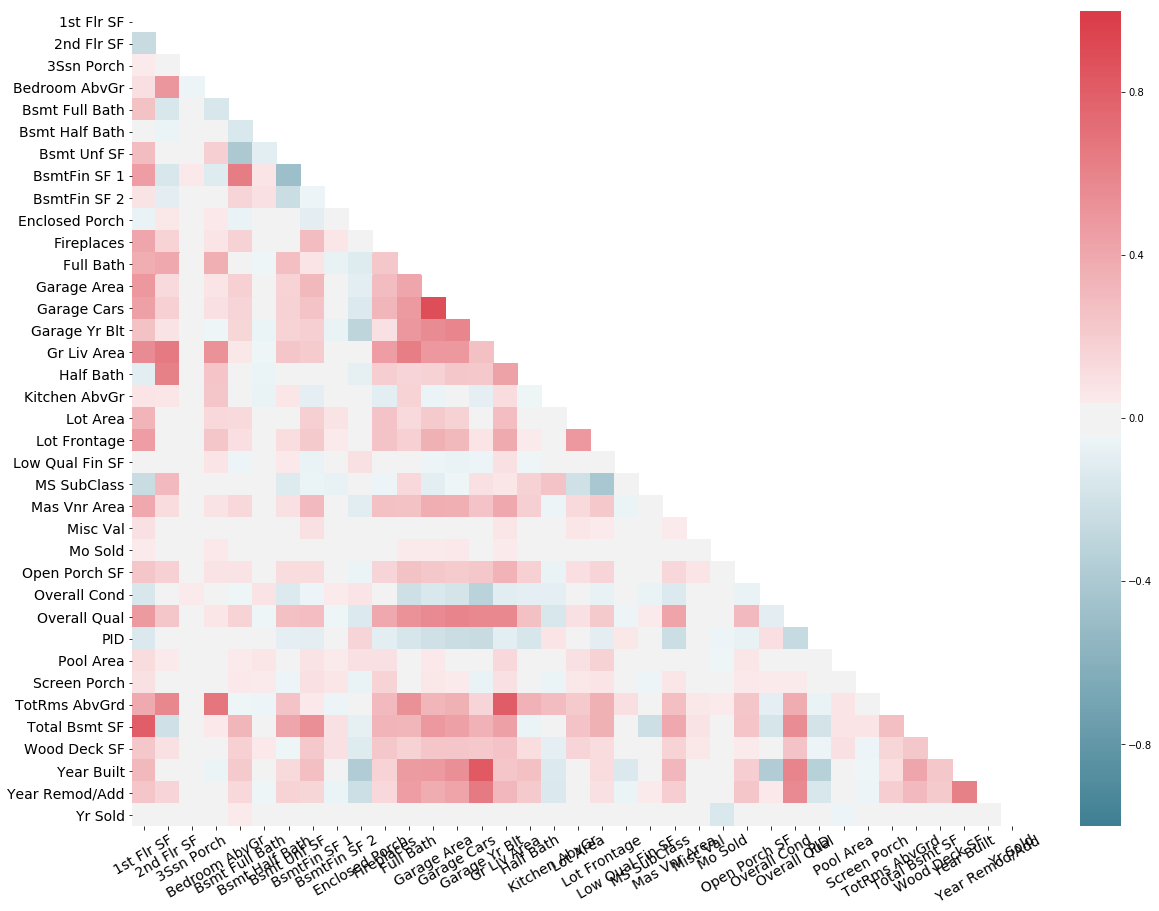

In [88]:
def correlation_heat_map(df):
    corrs = df.corr()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(20,15))

    # Generate a mask for the upper triangle (taken from the Seaborn example gallery):
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with Seaborn.
    # Assign the matplotlib axis the function returns. This allow us to resize the labels.
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    ax = sns.heatmap(corrs, mask=mask, annot=False, cmap=cmap, vmin=-1, vmax=1)

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()

df_with_target = train.copy()
# df_with_target['SalePrice'] = 
correlation_heat_map(df_with_target)